In [38]:
# Core
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling & preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [39]:
# Load the dataset
df = pd.read_csv('daily_all_dataset_features.csv', parse_dates=['date'], dayfirst=True)

print("Shape:", df.shape)
df.head()

Shape: (731000, 53)


,user_id,date,week_start,workday,profession,work_mode,chronotype,age,sex,height_cm,...,workouts_count,cheat_meals_count,has_intervention,intervention_diet_coaching,intervention_exercise_plan,intervention_meditation,intervention_sick_leave,intervention_therapy,intervention_vacation,intervention_workload_cap
0,1,2024-01-01,01/01/2024,True,operations,onsite,morning,27,female,174,...,10,1,False,False,False,False,False,False,False,False
1,1,2024-01-02,01/01/2024,True,operations,onsite,morning,27,female,174,...,10,1,False,False,False,False,False,False,False,False
2,1,2024-01-03,01/01/2024,True,operations,onsite,morning,27,female,174,...,10,1,False,False,False,False,False,False,False,False
3,1,2024-01-04,01/01/2024,True,operations,onsite,morning,27,female,174,...,10,1,False,False,False,False,False,False,False,False
4,1,2024-01-05,01/01/2024,True,operations,onsite,morning,27,female,174,...,10,1,False,False,False,False,False,False,False,False


In [40]:
# Take a random sample of 100,000 rows 
sample_df = df.sample(100000, random_state=42)

print("Sample shape:", sample_df.shape)
df = sample_df

Sample shape: (100000, 53)


In [41]:
# Data types 
df.info()

# Column counts by dtype
print("Columns:", len(df.columns))
print(df.dtypes.value_counts())

# Peek at a random sample
df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 667243 to 535434
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     100000 non-null  int64         
 1   date                        100000 non-null  datetime64[ns]
 2   week_start                  100000 non-null  object        
 3   workday                     100000 non-null  bool          
 4   profession                  100000 non-null  object        
 5   work_mode                   100000 non-null  object        
 6   chronotype                  100000 non-null  object        
 7   age                         100000 non-null  int64         
 8   sex                         100000 non-null  object        
 9   height_cm                   100000 non-null  int64         
 10  mental_health_history       100000 non-null  object        
 11  exercise_habit              100000 non-

,user_id,date,week_start,workday,profession,work_mode,chronotype,age,sex,height_cm,...,workouts_count,cheat_meals_count,has_intervention,intervention_diet_coaching,intervention_exercise_plan,intervention_meditation,intervention_sick_leave,intervention_therapy,intervention_vacation,intervention_workload_cap
537462,736,2024-06-26,24/06/2024,True,teacher,onsite,morning,50,female,180,...,2,0,False,False,False,False,False,False,False,False
459006,628,2025-10-31,27/10/2025,True,manager,onsite,intermediate,64,female,181,...,4,0,False,False,False,False,False,False,False,False
277257,380,2024-07-27,22/07/2024,False,operations,onsite,intermediate,62,male,162,...,6,0,False,False,False,False,False,False,False,False
75967,104,2025-11-05,03/11/2025,True,manager,onsite,morning,56,male,174,...,4,1,False,False,False,False,False,False,False,False
530785,727,2024-03-20,18/03/2024,True,nurse,shift,intermediate,22,female,172,...,6,1,False,False,False,False,False,False,False,False


In [42]:
#Missing values
missing_counts = df.isna().sum().sort_values(ascending=False)
display(missing_counts.head(20))

user_id                  0
date                     0
week_start               0
workday                  0
profession               0
work_mode                0
chronotype               0
age                      0
sex                      0
height_cm                0
mental_health_history    0
exercise_habit           0
caffeine_sensitivity     0
baseline_bmi             0
sleep_hours              0
sleep_quality            0
work_hours               0
meetings_count           0
tasks_completed          0
emails_received          0
dtype: int64

In [43]:
# Numeric summary
num_df = df.select_dtypes(include=[np.number])
display(num_df.describe().T)

# Categorical summary
cat_df = df.select_dtypes(include=['object', 'bool'])
for c in cat_df.columns:
    print(f"{c}: {df[c].nunique()} unique values")

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,500.409320,288.264930,1.000000,250.000000,501.000000,750.00,1000.000000
age,100000.0,42.778320,13.511486,20.000000,31.000000,43.000000,55.00,65.000000
height_cm,100000.0,169.750720,8.643813,140.000000,164.000000,170.000000,175.00,197.000000
baseline_bmi,100000.0,24.475489,2.192326,18.000000,23.000000,24.500000,26.00,31.800000
sleep_hours,100000.0,7.206162,0.886802,3.500000,6.610000,7.200000,7.80,10.500000
sleep_quality,100000.0,6.193290,1.457000,1.000000,5.000000,6.000000,7.00,10.000000
work_hours,100000.0,6.731665,3.264348,0.000000,4.070000,7.270000,8.93,19.680000
meetings_count,100000.0,2.581570,2.501301,0.000000,1.000000,2.000000,4.00,18.000000
tasks_completed,100000.0,6.742110,3.078749,0.000000,5.000000,7.000000,9.00,21.000000
emails_received,100000.0,55.080340,34.146967,0.000000,29.000000,59.000000,80.00,183.000000


week_start: 105 unique values
workday: 2 unique values
profession: 6 unique values
work_mode: 4 unique values
chronotype: 3 unique values
sex: 4 unique values
mental_health_history: 4 unique values
exercise_habit: 3 unique values
caffeine_sensitivity: 3 unique values
work_pressure: 2 unique values
has_intervention: 2 unique values
intervention_diet_coaching: 2 unique values
intervention_exercise_plan: 2 unique values
intervention_meditation: 2 unique values
intervention_sick_leave: 2 unique values
intervention_therapy: 2 unique values
intervention_vacation: 2 unique values
intervention_workload_cap: 2 unique values


In [44]:
# Full unique values for key categorical columns
for c in ['profession','work_mode','chronotype','sex','work_pressure']:
    if c in df.columns:
        print(f"\n{c} (n={df[c].nunique()}):")
        print(df[c].value_counts().head(10))


profession (n=6):
profession
operations           18022
teacher              17568
manager              17566
wellness_coach       16073
software_engineer    15827
nurse                14944
Name: count, dtype: int64

work_mode (n=4):
work_mode
onsite    53156
remote    16073
hybrid    15827
shift     14944
Name: count, dtype: int64

chronotype (n=3):
chronotype
intermediate    46747
morning         33810
evening         19443
Name: count, dtype: int64

sex (n=4):
sex
female    49352
male      49156
other       916
nb          576
Name: count, dtype: int64

work_pressure (n=2):
work_pressure
low       79212
medium    20788
Name: count, dtype: int64


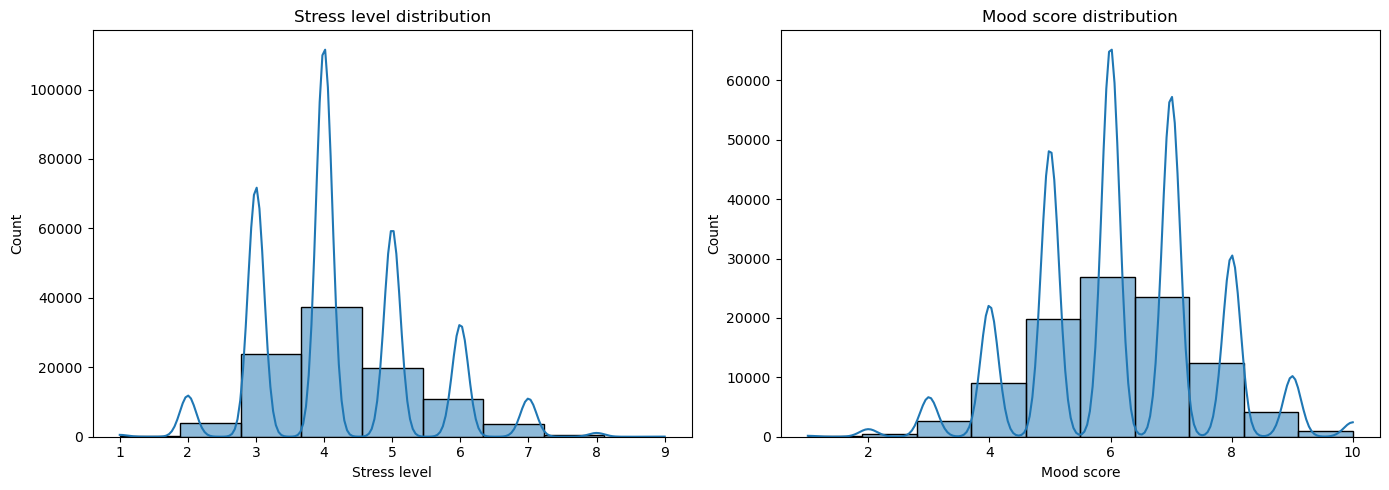

In [45]:
# Target variables
target_cols = ['stress_level', 'mood_score']

# Distributions (use a small sample for speed if needed)
sample = df.sample(50000, random_state=42) if len(df) > 200000 else df

#distribution plots for stress_level and mood_score
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df['stress_level'], bins=9, kde=True)
plt.title('Stress level distribution')
plt.xlabel('Stress level')

plt.subplot(1,2,2)
sns.histplot(df['mood_score'], bins=10, kde=True)
plt.title('Mood score distribution')
plt.xlabel('Mood score')

plt.tight_layout()
plt.show()

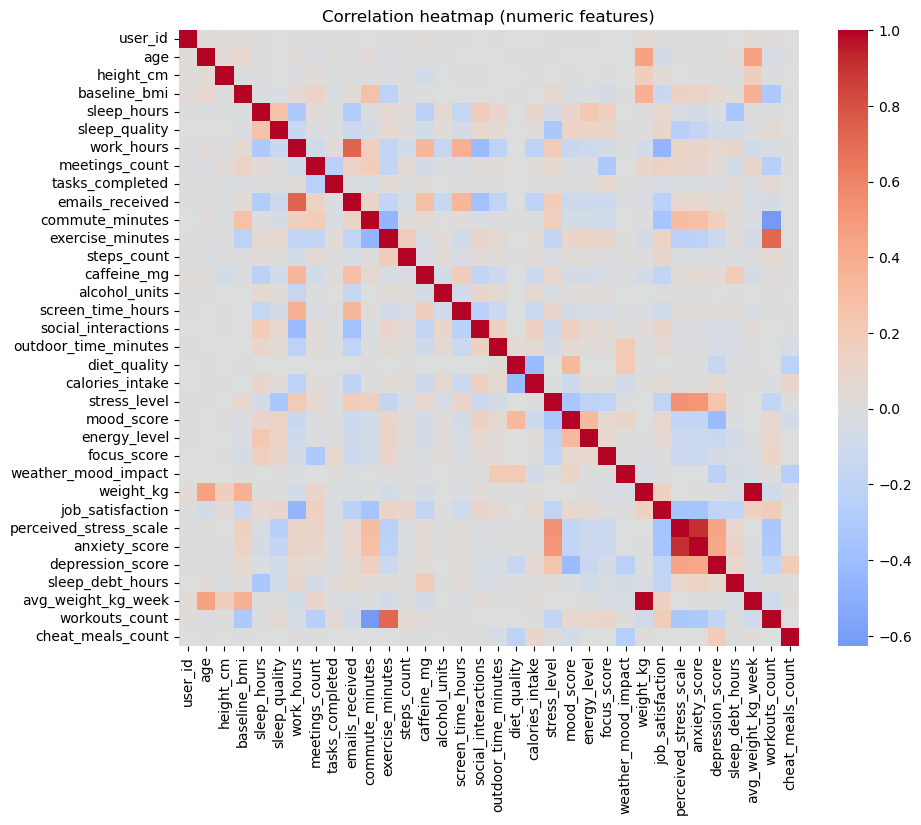

In [46]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(sample.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", center=0)
plt.title("Correlation heatmap (numeric features)")
plt.show()

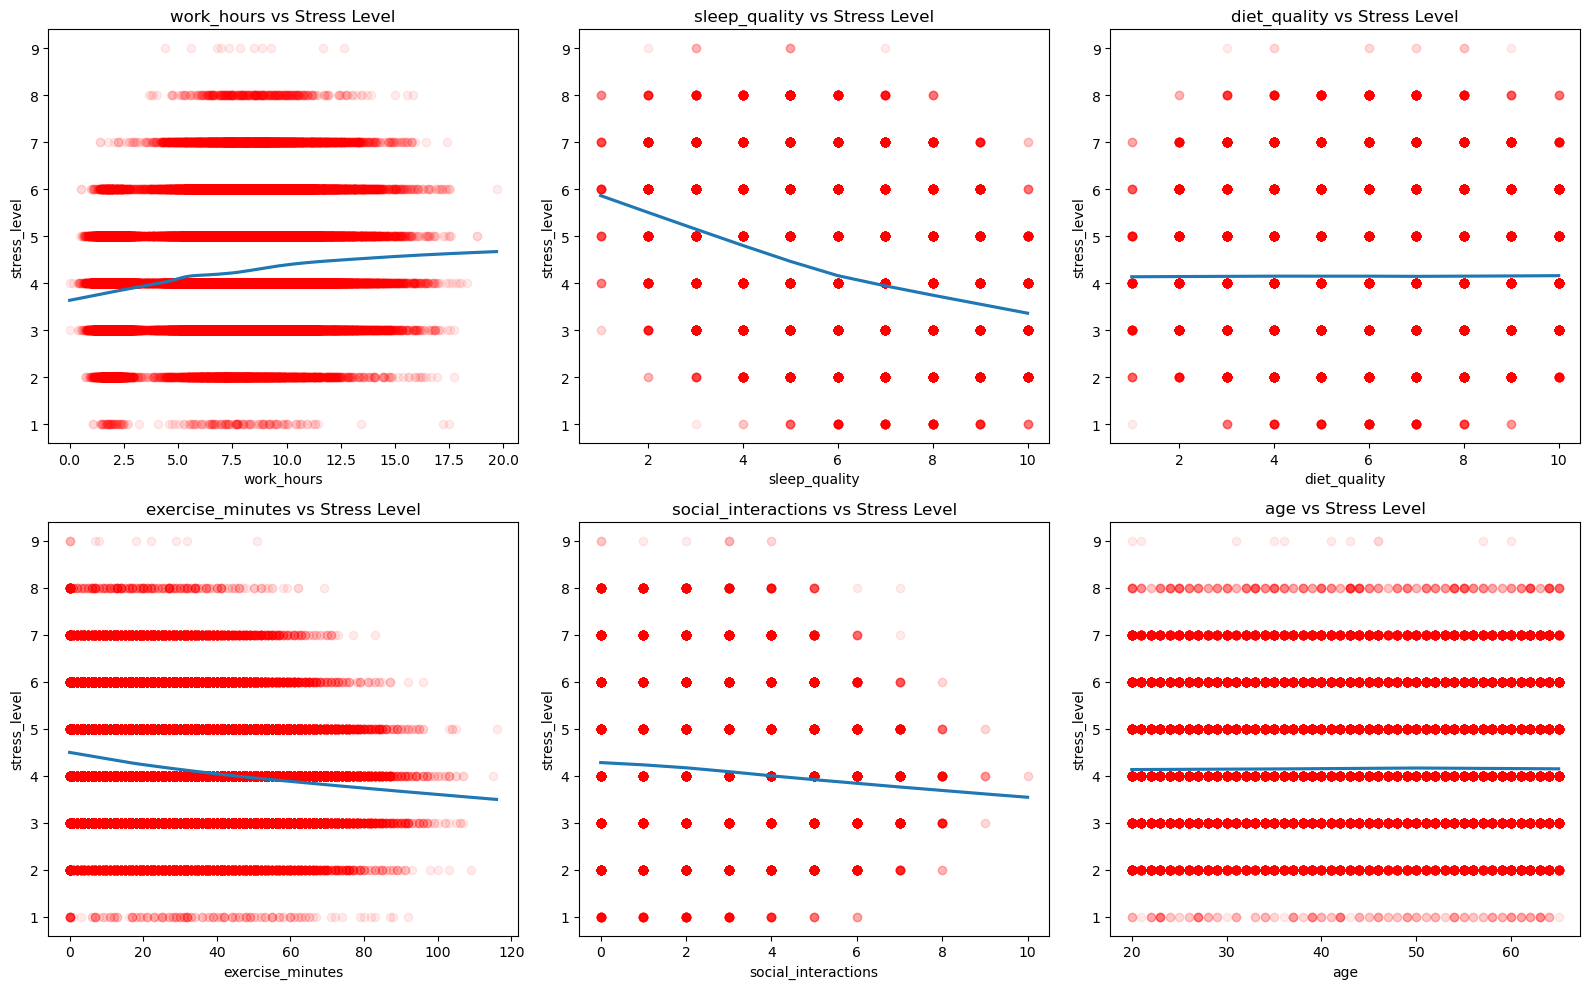

In [47]:
# Define features 
stress_features = [
    'work_hours',
    'sleep_quality',
    'diet_quality',
    'exercise_minutes',
    'social_interactions',
    'age'   
]

plt.figure(figsize=(16,10))
for i, col in enumerate(stress_features, 1):
    plt.subplot(2, 3, i)  
    sns.regplot(data=df, x=col, y='stress_level',
                lowess=True, scatter_kws={'alpha':0.08, 'color':'red'})
    plt.title(f"{col} vs Stress Level")
plt.tight_layout()
plt.show()

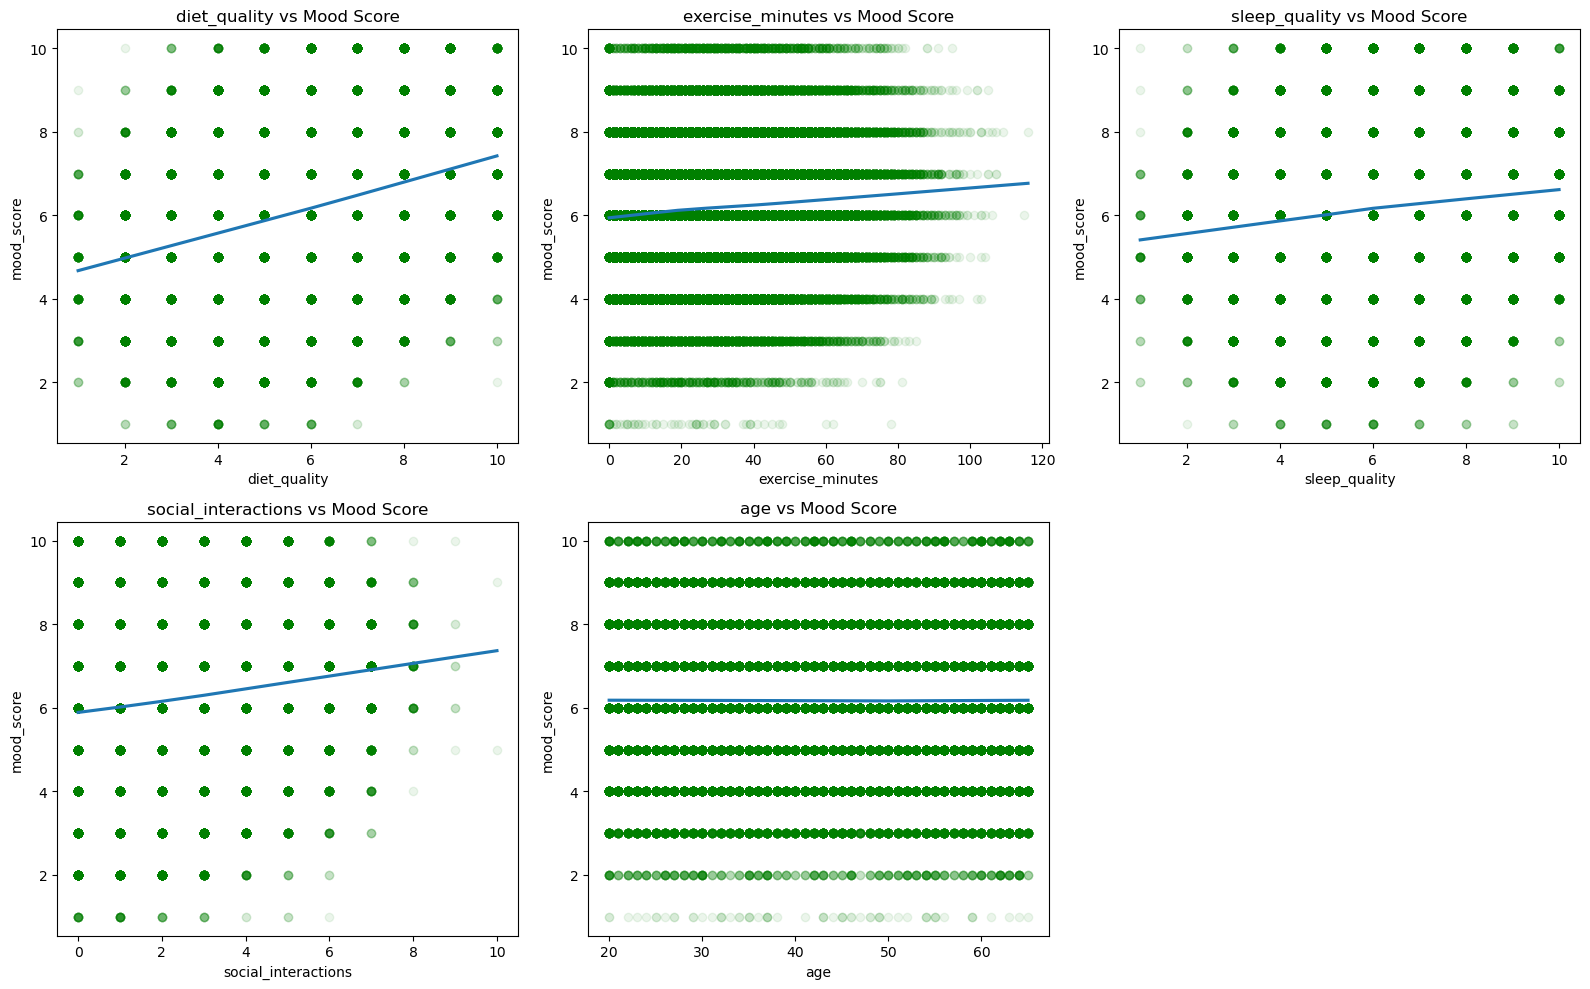

In [48]:
# Define features plot against mood_score
mood_features = [
    'diet_quality',
    'exercise_minutes',
    'sleep_quality',
    'social_interactions',
    'age'   
]

plt.figure(figsize=(16,10))
for i, col in enumerate(mood_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.regplot(data=df, x=col, y='mood_score',
                lowess=True, scatter_kws={'alpha':0.08, 'color':'green'})
    plt.title(f"{col} vs Mood Score")
plt.tight_layout()
plt.show()

In [49]:
from scipy.stats import pearsonr, ttest_ind, f_oneway
results_list = []  # store results here

def test_hypothesis(df, predictor, target):
    """
    Hypothesis testing:
    - Numeric predictor: Pearson correlation with target
    - Binary categorical/boolean predictor: Independent t-test
    - Multi-category predictor: One-way ANOVA
    Saves results into results_list for later DataFrame creation.
    """
    print(f"\nTesting hypothesis: {predictor} vs {target}")
    
    # Numeric predictor
    if np.issubdtype(df[predictor].dtype, np.number):
        corr, pval = pearsonr(df[predictor], df[target])
        print(f"Pearson correlation = {corr:.3f}, p-value = {pval:.4f}")
        result = "Significant " if pval < 0.05 else "Not significant "
        results_list.append({
            "Predictor": predictor,
            "Target": target,
            "Test": "Pearson correlation",
            "Statistic": f"{corr:.3f}",
            "p-value": f"{pval:.4f}",
            "Result": result
        })
    
    # Categorical predictor
    else:
        groups = df[predictor].unique()
        if len(groups) == 2:  # binary case
            g1 = df[df[predictor] == groups[0]][target]
            g2 = df[df[predictor] == groups[1]][target]
            tstat, pval = ttest_ind(g1, g2, equal_var=False)
            print(f"T-test between {groups[0]} and {groups[1]}: t = {tstat:.3f}, p-value = {pval:.4f}")
            result = "Significant " if pval < 0.05 else "Not significant "
            results_list.append({
                "Predictor": predictor,
                "Target": target,
                "Test": "T-test",
                "Statistic": f"{tstat:.3f}",
                "p-value": f"{pval:.4f}",
                "Result": result
            })
        elif len(groups) > 2:  # multi-category case
            samples = [df[df[predictor] == g][target] for g in groups]
            fstat, pval = f_oneway(*samples)
            print(f"ANOVA across {len(groups)} groups: F = {fstat:.3f}, p-value = {pval:.4f}")
            result = "Significant " if pval < 0.05 else "Not significant "
            results_list.append({
                "Predictor": predictor,
                "Target": target,
                "Test": "ANOVA",
                "Statistic": f"{fstat:.3f}",
                "p-value": f"{pval:.4f}",
                "Result": result
            })


In [50]:
# Run all hypotheses
test_hypothesis(df, 'work_hours', 'stress_level')
test_hypothesis(df, 'sleep_quality', 'stress_level')
test_hypothesis(df, 'mental_health_history', 'stress_level')
test_hypothesis(df, 'has_intervention', 'stress_level')
test_hypothesis(df, 'diet_quality', 'mood_score')
test_hypothesis(df, 'exercise_minutes', 'mood_score')
test_hypothesis(df, 'chronotype', 'mood_score')
test_hypothesis(df, 'social_interactions', 'mood_score')

# Convert results to DataFrame
results_df = pd.DataFrame(results_list)
display(results_df)


Testing hypothesis: work_hours vs stress_level
Pearson correlation = 0.203, p-value = 0.0000

Testing hypothesis: sleep_quality vs stress_level
Pearson correlation = -0.321, p-value = 0.0000

Testing hypothesis: mental_health_history vs stress_level
ANOVA across 4 groups: F = 11.370, p-value = 0.0000

Testing hypothesis: has_intervention vs stress_level
T-test between False and True: t = -0.602, p-value = 0.5475

Testing hypothesis: diet_quality vs mood_score
Pearson correlation = 0.322, p-value = 0.0000

Testing hypothesis: exercise_minutes vs mood_score
Pearson correlation = 0.092, p-value = 0.0000

Testing hypothesis: chronotype vs mood_score
ANOVA across 3 groups: F = 0.465, p-value = 0.6282

Testing hypothesis: social_interactions vs mood_score
Pearson correlation = 0.153, p-value = 0.0000


,Predictor,Target,Test,Statistic,p-value,Result
0,work_hours,stress_level,Pearson correlation,0.203,0.0000,Significant
1,sleep_quality,stress_level,Pearson correlation,-0.321,0.0000,Significant
2,mental_health_history,stress_level,ANOVA,11.370,0.0000,Significant
3,has_intervention,stress_level,T-test,-0.602,0.5475,Not significant
4,diet_quality,mood_score,Pearson correlation,0.322,0.0000,Significant
5,exercise_minutes,mood_score,Pearson correlation,0.092,0.0000,Significant
6,chronotype,mood_score,ANOVA,0.465,0.6282,Not significant
7,social_interactions,mood_score,Pearson correlation,0.153,0.0000,Significant


In [51]:
# Define targets
target_cols = ['stress_level', 'mood_score']

# Remove leakage columns
leakage_cols = ['user_id','date','week_start']

# Feature frame from sample
feature_df = sample_df.drop(columns=target_cols + leakage_cols, errors='ignore')

# Targets
y_stress = sample_df['stress_level']
y_mood   = sample_df['mood_score']

In [52]:
# Boolean columns
bool_cols = feature_df.select_dtypes(include=['bool']).columns.tolist()

# Categorical (string/object)
cat_cols = feature_df.select_dtypes(include=['object']).columns.tolist()

# Numeric columns
num_cols = feature_df.select_dtypes(include=[np.number]).columns.tolist()

print("Boolean columns:", bool_cols)
print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

Boolean columns: ['workday', 'has_intervention', 'intervention_diet_coaching', 'intervention_exercise_plan', 'intervention_meditation', 'intervention_sick_leave', 'intervention_therapy', 'intervention_vacation', 'intervention_workload_cap']
Categorical columns: ['profession', 'work_mode', 'chronotype', 'sex', 'mental_health_history', 'exercise_habit', 'caffeine_sensitivity', 'work_pressure']
Numeric columns: ['age', 'height_cm', 'baseline_bmi', 'sleep_hours', 'sleep_quality', 'work_hours', 'meetings_count', 'tasks_completed', 'emails_received', 'commute_minutes', 'exercise_minutes', 'steps_count', 'caffeine_mg', 'alcohol_units', 'screen_time_hours', 'social_interactions', 'outdoor_time_minutes', 'diet_quality', 'calories_intake', 'energy_level', 'focus_score', 'weather_mood_impact', 'weight_kg', 'job_satisfaction', 'perceived_stress_scale', 'anxiety_score', 'depression_score', 'sleep_debt_hours', 'avg_weight_kg_week', 'workouts_count', 'cheat_meals_count']


In [53]:
# StandardScaler for numeric; OneHot for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('bool', 'passthrough', bool_cols)
    ],
    remainder='drop'
)

In [54]:
X_train, X_test, y_train_stress, y_test_stress = train_test_split(
    feature_df, y_stress, test_size=0.2, random_state=42
)

X_train, X_test, y_train_mood, y_test_mood = train_test_split(
    feature_df, y_mood, test_size=0.2, random_state=42
)


In [55]:
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) 
    print(f"{name} -> R2: {r2:.3f} | MAE: {mae:.3f} | RMSE: {rmse:.3f}")
    return {'Model': name, 'R2': r2, 'MAE': mae, 'RMSE': rmse}

In [56]:
# target: 'stress_level.' 
target = 'stress_level'
X = feature_df.copy()
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipelines
linreg = Pipeline(steps=[('prep', preprocessor), ('model', LinearRegression())])
rf = Pipeline(steps=[('prep', preprocessor), ('model', RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42))])
gb = Pipeline(steps=[('prep', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))])

# Fit and evaluate
linreg.fit(X_train, y_train)
pred_lin = linreg.predict(X_test)
metrics_lin = evaluate_model("Linear Regression", y_test, pred_lin)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
metrics_rf = evaluate_model("Random Forest", y_test, pred_rf)

gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
metrics_gb = evaluate_model("Gradient Boosting", y_test, pred_gb)

# Collect results
results_stress = pd.DataFrame([metrics_lin, metrics_rf, metrics_gb])
display(results_stress)

Linear Regression -> R2: 0.542 | MAE: 0.635 | RMSE: 0.798
Random Forest -> R2: 0.542 | MAE: 0.633 | RMSE: 0.799
Gradient Boosting -> R2: 0.548 | MAE: 0.630 | RMSE: 0.793


,Model,R2,MAE,RMSE
0,Linear Regression,0.542286,0.634670,0.798479
1,Random Forest,0.541790,0.632918,0.798911
2,Gradient Boosting,0.548009,0.629647,0.793471


In [57]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_scores(pipeline, X, y, scoring='r2'):
    scores = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)
    return scores.mean(), scores.std()

# CV R2
print("CV R2 (Linear):", cv_scores(linreg, X_train, y_train, 'r2'))
print("CV R2 (RandomForest):", cv_scores(rf, X_train, y_train, 'r2'))
print("CV R2 (GradientBoosting):", cv_scores(gb, X_train, y_train, 'r2'))

CV R2 (Linear): (np.float64(0.542741208765376), np.float64(0.006367986254484884))
CV R2 (RandomForest): (np.float64(0.5423980346603369), np.float64(0.005565140158203765))
CV R2 (GradientBoosting): (np.float64(0.5489299086167224), np.float64(0.0059699709755155))


In [58]:
target = 'mood_score'
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg.fit(X_train, y_train)
metrics_lin_m = evaluate_model("Linear Regression (mood)", y_test, linreg.predict(X_test))

rf.fit(X_train, y_train)
metrics_rf_m = evaluate_model("Random Forest (mood)", y_test, rf.predict(X_test))

gb.fit(X_train, y_train)
metrics_gb_m = evaluate_model("Gradient Boosting (mood)", y_test, gb.predict(X_test))

results_mood = pd.DataFrame([metrics_lin_m, metrics_rf_m, metrics_gb_m])
display(results_mood)


Linear Regression (mood) -> R2: 0.345 | MAE: 0.953 | RMSE: 1.191
Random Forest (mood) -> R2: 0.323 | MAE: 0.968 | RMSE: 1.211
Gradient Boosting (mood) -> R2: 0.341 | MAE: 0.955 | RMSE: 1.194


,Model,R2,MAE,RMSE
0,Linear Regression (mood),0.344963,0.952649,1.190998
1,Random Forest (mood),0.322990,0.968052,1.210809
2,Gradient Boosting (mood),0.341278,0.954868,1.194343


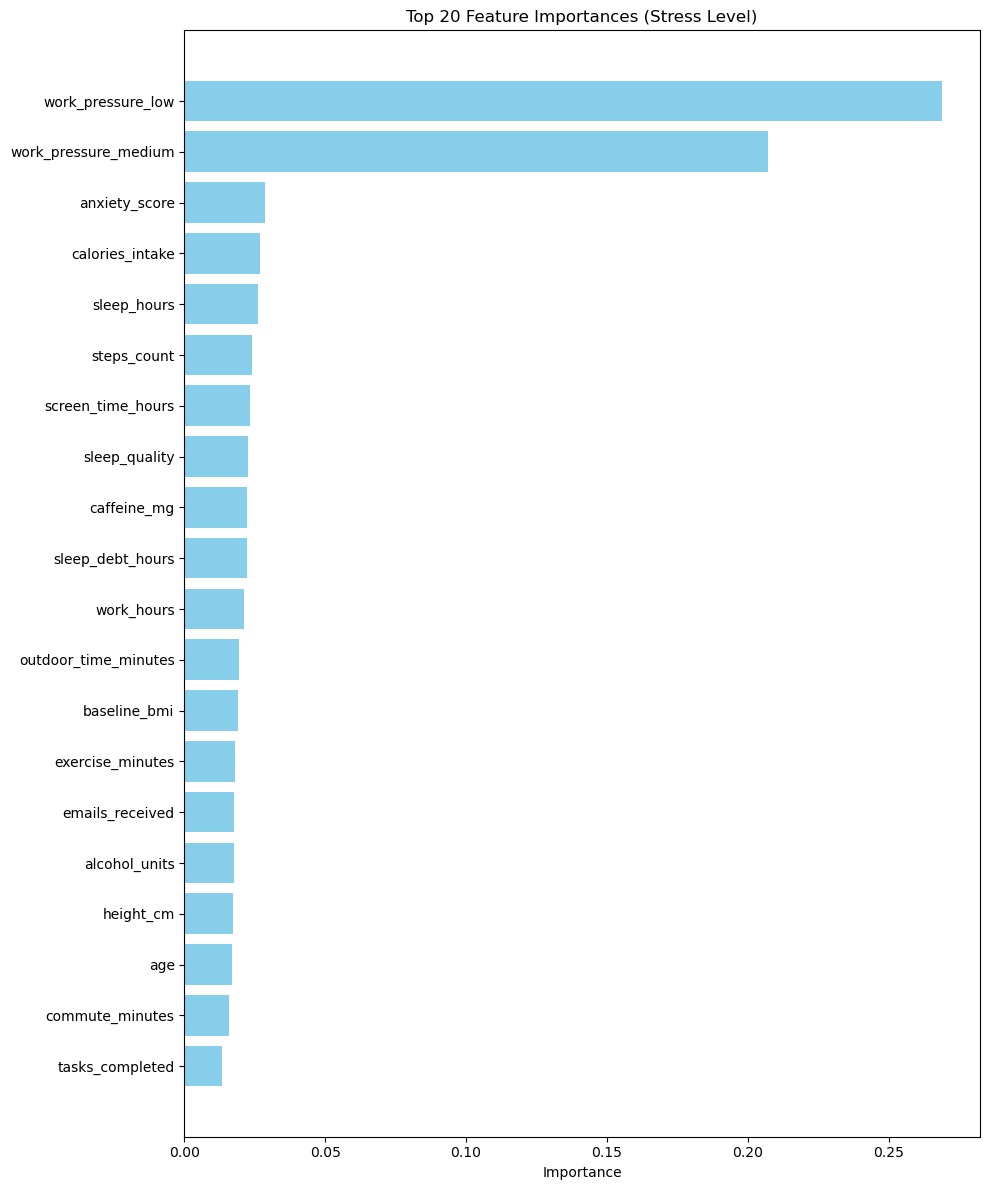

In [59]:
# Plot top 20 feature importances 
importances = rf_stress.feature_importances_
idx = np.argsort(importances)[::-1][:20]   
features = np.array(final_feature_names)[idx]

plt.figure(figsize=(10, 12))
plt.barh(range(20), importances[idx], color='skyblue')
plt.yticks(range(20), features)
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Stress Level)")
plt.gca().invert_yaxis()   
plt.tight_layout()
plt.show()

In [ ]:
# Train Random Forest on transformed data for mood
target = 'mood_score'
y_mood = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y_mood, test_size=0.2, random_state=42
)

# Fit preprocessor
preprocessor.fit(X_train)
X_train_trans = preprocessor.transform(X_train)

# Train model
rf_mood = RandomForestRegressor(n_estimators=200, random_state=42)
rf_mood.fit(X_train_trans, y_train)

# Feature importances
importances = rf_mood.feature_importances_
idx = np.argsort(importances)[::-1][:20]
features = np.array(final_feature_names)[idx]

# Plot horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(range(20), importances[idx], color='skyblue')
plt.yticks(range(20), features)
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (Mood Score)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [61]:
print('THANK YOU')

THANK YOU
